In [3]:
#impor necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [4]:
# Load the training and testing data (MNIST)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# Define the network architecture using Keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

C:\Users\vaish\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model using SGD
model.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=3  
)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7273 - loss: 1.0645 - val_accuracy: 0.8991 - val_loss: 0.3626
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8969 - loss: 0.3641 - val_accuracy: 0.9161 - val_loss: 0.2999
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9149 - loss: 0.3008 - val_accuracy: 0.9258 - val_loss: 0.2680


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9143 - loss: 0.3098
Loss=0.268
Accuracy=0.926


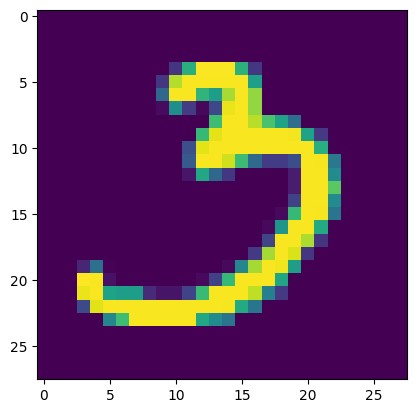

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


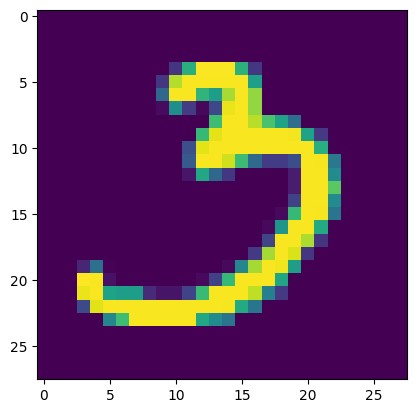

Predicted Values: [3.3094291e-02 1.0757996e-05 3.0188381e-03 9.5831591e-01 6.6708083e-08
 7.0520466e-05 1.0194633e-06 5.4207779e-03 3.4827692e-05 3.2976681e-05]


In [9]:
# Evaluate the Network
test_loss,test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

n=random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print('Predicted Values:', predicted_value[n])

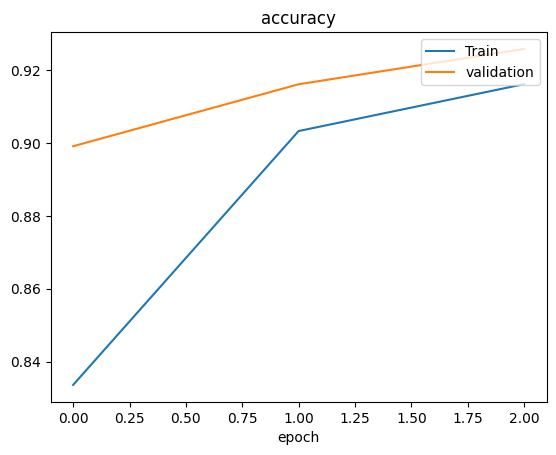

In [10]:
# Plot the training loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper right')